<a href="https://colab.research.google.com/github/sammyculotta/PHY122-Lab/blob/main/phy122_2bodyt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Body Motion \& Collisions

Michael Culotta


05/02/25

# Objective

### To Understand Velocity Verlet Applied to 2-body systems, including their mutual interaction and thus their inevitable collisions.

# Introduction


## **2 Body Motion**
### So far we have only considered motion of a single particle. We know that reality is more complex, and thus here we consider our largest system yet, 2 particles! Both of these particles have their own equation-of-motion \begin{align} m_1\ddot{\mathbf{x}}_1 &= \mathbf{f}_{12} \\ m_2\ddot{\mathbf{x}}_2 &= \mathbf{f}_{21} \end{align} for positions of particle $\mathbf{x}_1$ and $\mathbf{x}_2$ respectively, interacting with a force between the particles $\mathbf{f}(\mathbf{x}_1, \mathbf{x}_2)$. Instead of a two-variable force, we may decrease the degrees-of-freedom by defining the inter-particle displacement: \begin{align} \Delta \mathbf{x}_{12} &= \mathbf{x}_1 - \mathbf{x}_2 \quad.\end{align} Therefore the inter-particle force is instead $\mathbf{f}(\mathbf{x}_{12})$ which is shortened to $\mathbf{f}(\mathbf{x}_{12}) = \mathbf{f}_{12}$. Note by virtue of Newton's 3rd Law, the force acting on particle 2 is the opposite: $\mathbf{f}_{21} = -\mathbf{f}_{12}$.


### In order to alleviate the abstraction, here we consider a common and simple two-body interaction force of a spring. That is the aforementioned force is: \begin{align} \mathbf{f}(\mathbf{x}_{12}) = \mathbf{f}_{12} = 4\mathscr{E}\left( \frac{12}{R^{13}} - \frac{6}{R^{7}}\right)\frac{\Delta \mathbf{x}_{12}}{R},\quad\quad\quad R = |\mathbf{x}_{12}| = |\mathbf{x}_{21}|. \end{align} The parameter $\mathscr{E}$ is a scalar in units of energy, and describes the cohesive energy of this potential.

## **Momentum-Verlet**
### Here we consider the Momentum-Verlet integrator, with the equations of:\begin{align} \mathbf{x}(t+1) &= \mathbf{x}(t) + \left( \mathbf{p}(t) \,dt + \mathbf{f}(t) \frac{dt^2}{2} \right) \frac{1}{m} \\ \mathbf{f}(t+1) &= \,\,.... \\ \mathbf{p}(t+1) &= \mathbf{p}(t) + \frac{\left( \mathbf{f}(t) + \mathbf{f}(t+1) \right) \,dt}{2} \end{align} applied at every time-step.


## **Energy of the System**
### We now may calculate the energy of the system. We may partition the energy into 1-body and 2-body contributions. Here the 1-body contribution is known as the *kinetic-energy*, it is considered a 1-body contribution because it is only a function of each body independent of one another. Its functional form, in terms of momentum is: \begin{align} K &= \frac{\mathbf{p}^2_1}{2m} + \frac{\mathbf{p}^2_2}{2m} \quad. \end{align} Next the 2-body contribution, is the energy of the interaction, this is known as the *potential-energy*. It exists by virtue of the partciles not being in isolation, but interacting with something. Notice its functional form cannot be seperated like the kinetic-energy (1-body interaction): \begin{align} U(R) &= 4\mathscr{E} \left( \frac{1}{R^{12}} - \frac{1}{R^{6}} \right) \quad\quad.\end{align} With $\mathscr{E}$ is the same parameter defined earlier. Notice that we may apply: \begin{align} f_{12} &= - \frac{\partial U(R)}{\partial R} \,\frac{ \Delta \mathbf{x}_{12} }{R} \quad, \\ f_{21} &= - \frac{\partial U(R)}{\partial R} \,\frac{ \Delta \mathbf{x}_{21} }{R}\quad. \end{align}


## **Collisions**
### Now we consider collisions between the two particles. For a closed system (one with no friction) the total energy and momentum must be conserved. Here we will be considering closed collisions with the aforementioned Lennhard-Jones interaction.


## **Elastic Collisions**
### An elastic collision is an event whereby the particles exchange momentum, but the total kinetic energy is conserved.

## **Inelastic Collisions**
### An inelastic collision is an event whereby the particles exchange momentum, but the total kinetic energy is **not** conserved (although for closed systems the total energy is conserved). This means for inelastic collisions some kinetic energy was converted to potential energy.

### In particular, we would like to see a collision of two particles/bodies, after which they are bound with each other (as shown in the example).

## Simulation Tips

### For clearer simulation demonstration of elastic collisions should have alot of initial kinetic energy (larger initial velocities), the inelastic simulation should have low initial kinetic energy (smaller initial velocities).

### Make sure you have a sufficiently small time-step $\delta t$ to fully capture the collision-event.

### Total Momentum may be calculated: \begin{align*}
  p_{tix} &= \sum_i p_{tix}, \\
  p_{t} &= \sum_{ix} p_{tix}
\end{align*}

### Let's import the necessary modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

π = np.pi

## Example Code for Collisions

In [ ]:
Δt = 0.001 ## s(detector)
tf = 10
timeline = np.arange(0, tf, Δt)

m_i  = np.array([2., 4.]) ## kg
R_ix = np.array([[-1., 0., 0.],[4., 0., 0.]]) ## m
v_ix = np.array([[2.50, 0., 0.],[0., 0., 0.]]) ## m/s

p_ix  = m_i[:, None]*v_ix ## kg m / s
f_ix  = np.zeros((2,3)) ## N
### empty arrays to save data
R_tix = np.zeros( (len(timeline), R_ix.shape[0], R_ix.shape[1] ) )
p_tix = np.zeros( (len(timeline), R_ix.shape[0], R_ix.shape[1] ) )
K     = np.zeros(len(timeline))
U     = np.zeros(len(timeline))
for t in range(len(timeline)):

    R_ix  += (p_ix * Δt + f_ix * Δt**2 / 2)/m_i[:, None]
    R_tix[t] = 1.*R_ix ## save trajectory
    p_tix[t] = 1.*p_ix ## save momentums

    Δx     = R_ix[0] - R_ix[1]
    R      = norm(Δx)
    F_ix   = 150*(12/R**13 - 6/R**7) * np.array([Δx, -Δx])/R

    p_ix  += ( f_ix + F_ix ) * Δt / 2
    f_ix   = F_ix

    K[t]   = np.sum(p_ix[0]**2) / (2*m_i[0]) + np.sum(p_ix[1]**2) / (2*m_i[1]) ## save kinetic energy
    U[t]   = 150*(1/R**12 - 1/R**6)

## Plots

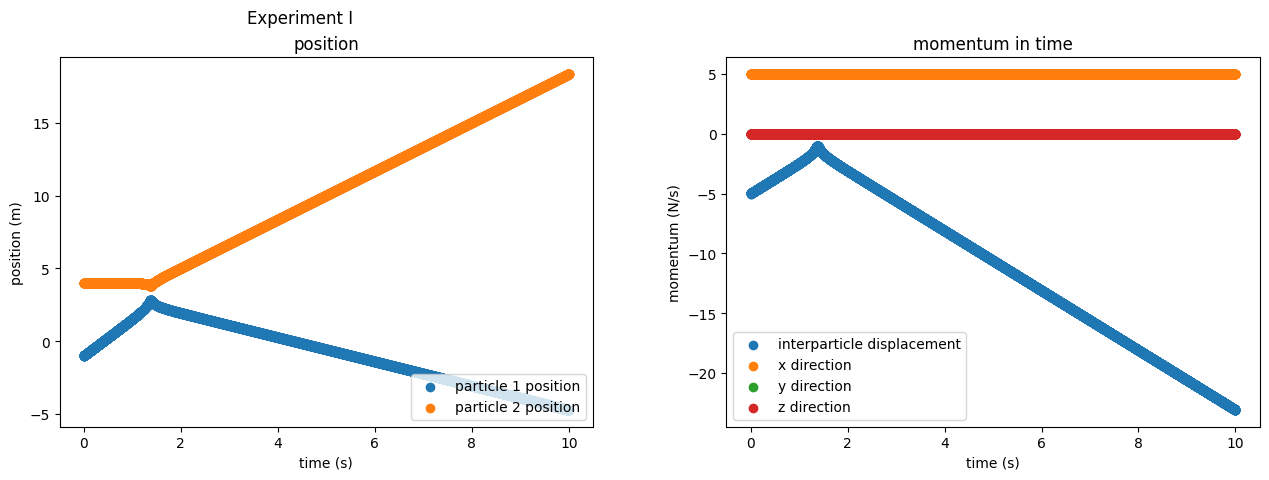

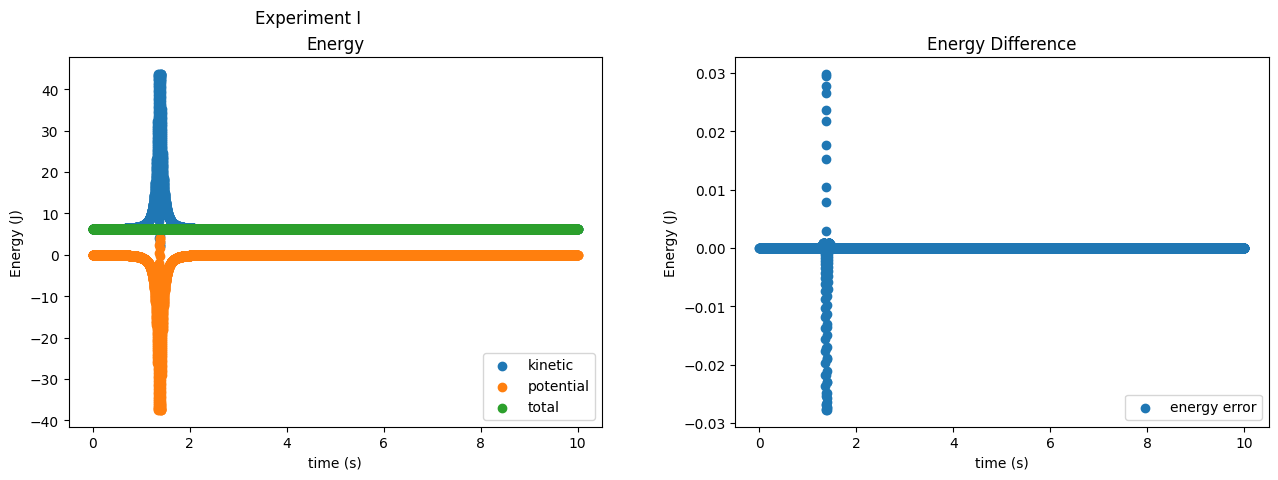

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, R_tix[:, 0, 0], label="particle 1 position")
ax1.scatter(timeline, R_tix[:, 1, 0], label="particle 2 position")
ax1.set_title("position")
ax1.set(xlabel='time (s)', ylabel='position (m)')
ax1.legend(loc="lower right")

ax2.scatter(timeline, R_tix[:, 0, 0]-R_tix[:, 1, 0], label="interparticle displacement")
ax2.set_title("relative displacement")
ax2.set(xlabel='time (s)', ylabel='displacement (m)')
ax2.legend(loc="lower right")
fig.show()

p_tx = np.sum(p_tix, axis=1)
plt.scatter(timeline, p_tx[:,0], label="x direction")
plt.scatter(timeline, p_tx[:,1], label="y direction")
plt.scatter(timeline, p_tx[:,2], label="z direction")
plt.title("momentum in time")
plt.xlabel("time (s)")
plt.ylabel("momentum (N/s)")
plt.legend()
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, K, label="kinetic")
ax1.scatter(timeline, U, label="potential")
ax1.scatter(timeline, K+U, label="total")
ax1.set_title("Energy")
ax1.set(xlabel='time (s)', ylabel='Energy (J)')
ax1.legend(loc="lower right")

ax2.scatter(timeline, (K+U) - (K+U)[0], label="energy error")
ax2.set_title("Energy Difference")
ax2.set(xlabel='time (s)', ylabel='Energy (J)')
ax2.legend(loc="lower right")

fig.show()

#   <font color='Red'> **Elastic Scattering** </font>


###   <font color='Red'> Code: for the 2-body Velocity-Verlet Elastic Simulation </font>


In [32]:
Δt = 0.00001 ## s (detector temporal resolution)
T = np.arange(0, 10, Δt) ## s

γ    = 0.00
m_i  = np.array([2., 4.]) ## kg
R_ix = np.array([[-1., 0., 0.],[4., 0., 0.]]) ## m
v_ix = np.array([[1.5, 0., 0.],[0., 0., 0.]]) ## m/s

p_ix  = m_i[:, None]*v_ix ## kg m / s
f_ix  = np.zeros((2,3)) ## N
### empty arrays to save data
R_tix = np.zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
p_tix = np.zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
K     = np.zeros(len(T))
U     = np.zeros(len(T))
for t in range(len(T)):

    R_ix  += (p_ix * Δt + f_ix * Δt**2 / 2)/m_i[:, None]
    R_tix[t] = 1.*R_ix ## save trajectory
    p_tix[t] = 1.*p_ix ## save momentums

    Δx     = R_ix[0] - R_ix[1]
    R      = norm(Δx)
    F_ix   = 150*(12/R**13 + 6/R**7) * np.array([Δx, -Δx])/R - γ * p_ix

    p_ix  += ( f_ix + F_ix ) * Δt / 2
    f_ix   = F_ix

    K[t]   = np.sum(p_ix[0]**2) / (2*m_i[0]) + np.sum(p_ix[1]**2) / (2*m_i[1]) ## save kinetic energy
    U[t]   = 150*(1/R**12 + 1/R**6)

###   <font color='Red'> Plot: Trajectory in Time </font>


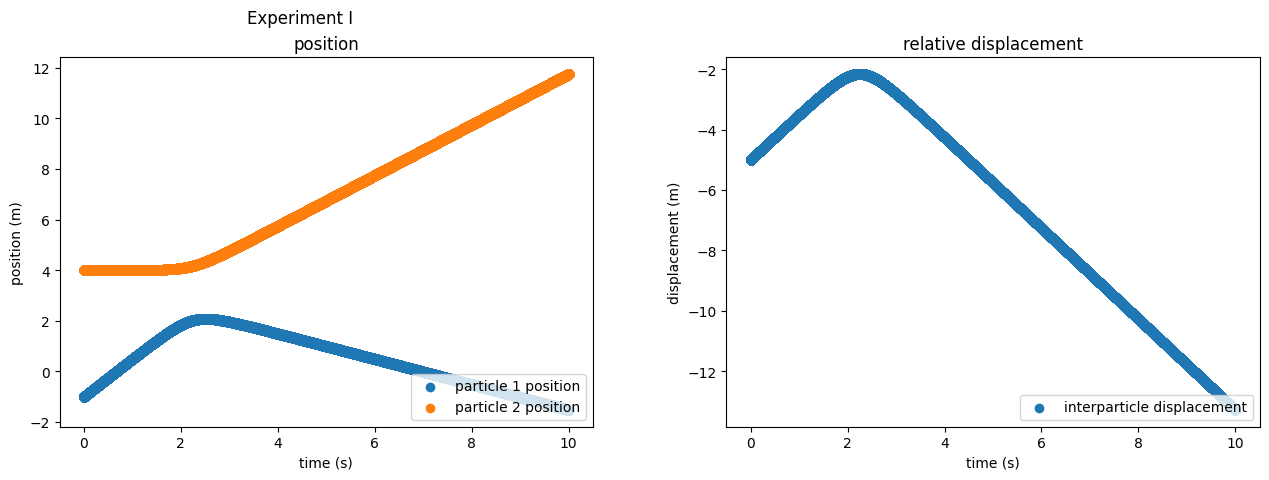

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, R_tix[:, 0, 0], label="particle 1 position")
ax1.scatter(T, R_tix[:, 1, 0], label="particle 2 position")
ax1.set_title("position")
ax1.set(xlabel='time (s)', ylabel='position (m)')
ax1.legend(loc="lower right")

ax2.scatter(T, R_tix[:, 0, 0]-R_tix[:, 1, 0], label="interparticle displacement")
ax2.set_title("relative displacement")
ax2.set(xlabel='time (s)', ylabel='displacement (m)')
ax2.legend(loc="lower right")
fig.show()

The above graphs show us position vs time and relative displacement vs time. In the position vs. time graph we see that particle 1 is moving with an initial velocity of 1.5 m/s towards the stationary particle 2. As the particles get closer, they intereact via the repulsive Lennard-Jones force. After the collision we see particle 2, which started at rest, rebound from particle 1. This is elastic scattering in play. The particles exchange momentum and the total kinetic energy is conserved.

In the relative displacement graph we see the distance between the particles over time which is similar in shape of an upside down parabola, but turns linear towards each end. The apex of the parabola represents the point at which the particles are the closesest and the replusive force the strongest. The reason that the relative displacement in this scenario diverges rather than converging again is because there is no negative term in the code:  F_ix   = 150*(12/R**13 + 6/R**7) * np.array([Δx, -Δx])/R - γ * p_ix. We only have postive terms which  are repulsive foreces.


###   <font color='Red'> Plot: Total Momentum in Time </font>


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


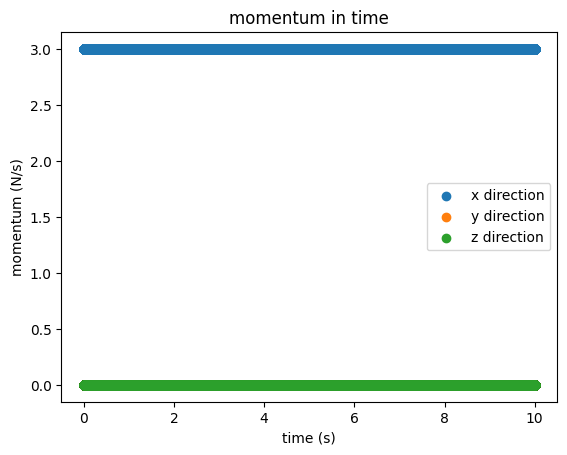

In [34]:

p_tx = np.sum(p_tix, axis=1)
plt.scatter(T, p_tx[:,0], label="x direction")
plt.scatter(T, p_tx[:,1], label="y direction")
plt.scatter(T, p_tx[:,2], label="z direction")
plt.title("momentum in time")
plt.xlabel("time (s)")
plt.ylabel("momentum (N/s)")
plt.legend()
plt.show()

The above chart shows conservation of momentum at play. We see that momentum is conserved in all directions for the elastic scattering experiment. In this experiment the only forces present are internal forces of the system i.e. the Lennard-Jones force. The system is isolated and there are no other forces such as gravity or friction which might affect the particles. X direction momentum is constant because we have motion in the x direction whereas Y and Z are zero because there is no motion in these directions. So, while the particles do *exchange* momentum, it is conserved.

###   <font color='Red'> Plot: Energy (kinetic, potential, and total) in Time </font>

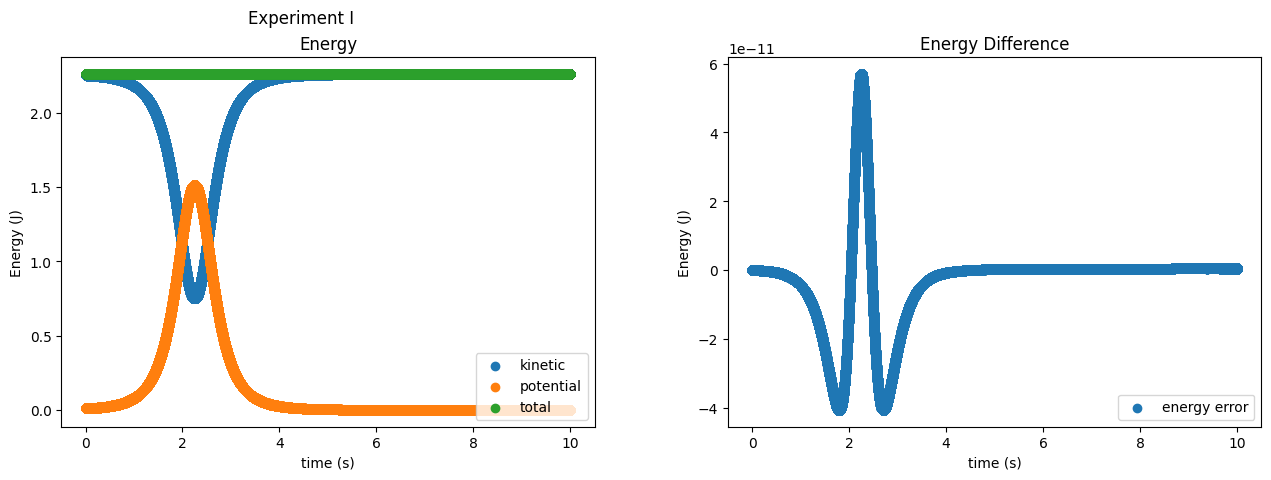

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, K, label="kinetic")
ax1.scatter(T, U, label="potential")
ax1.scatter(T, K+U, label="total")
ax1.set_title("Energy")
ax1.set(xlabel='time (s)', ylabel='Energy (J)')
ax1.legend(loc="lower right")

ax2.scatter(T, (K+U) - (K+U)[0], label="energy error")
ax2.set_title("Energy Difference")
ax2.set(xlabel='time (s)', ylabel='Energy (J)')
ax2.legend(loc="lower right")

fig.show()

In the above graph we see total energy of the system which is broken down into kinetic and potential energy. We see that the total energy of the system is conversved throughout the time interval. We see fluctuations which are complementary to one another meaning, as kinetic energy decreases(due to the repulsive Lennard-Jones force which slows the particles initial velocity) the potential energy is increasing and vice versa. We see this to be the case in the graph. When kinetic energy is at its lowest point, the objects are at their closest point, and the potential energy is at its maximum. At the min kinetic and max potential is also the moment at which the particles exchange momentum.

I am weary about the energy error fluctuation of 10J in this simulation. I'm not sure why this is the case. I thought originally that it might be due to using the velocity verlet integration method, but think that the error should be smaller if this was the primary reason. I change the time step interval to be much smaller at .00001 to see if this might be the issue, but it had no effect. Given that the total energy of the system is ~2.5J a 10J swing means something is off. I conclude that there is something else wrong with the code that I'm unable to solve for at the moment.

#   <font color='Red'> **Inelastic Scattering** </font>


###   <font color='Red'> Code: for the 2-body Velocity-Verlet Inelastic Simulation </font>

In [40]:
Δt = 0.001 ## s(detector)
tf = 100
T = np.arange(0, tf, Δt)

γ    = 0.00
m_i  = np.array([2., 4.]) ## kg
R_ix = np.array([[-1., 0., 0.],[4., 0., 0.]]) ## m
v_ix = np.array([[0.030, 0., 0.],[0., 0., 0.]]) ## m/s

p_ix  = m_i[:, None]*v_ix ## kg m / s
f_ix  = np.zeros((2,3)) ## N
### empty arrays to save data
R_tix = np.zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
p_tix = np.zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
K     = np.zeros(len(T))
U     = np.zeros(len(T))
for t in range(len(T)):

    R_ix  += (p_ix * Δt + f_ix * Δt**2/2)/m_i[:, None]
    R_tix[t] = 1.*R_ix ## save trajectory
    p_tix[t] = 1.*p_ix ## save momentums

    Δx     = R_ix[0] - R_ix[1]
    R      = norm(Δx)
    F_ix   = 150*(12/R**13 - 6/R**7) * np.array([Δx, -Δx])/R - γ * p_ix

    p_ix  += ( f_ix + F_ix ) * Δt/2
    f_ix   = F_ix

    K[t]   = np.sum(p_ix[0]**2) / (2*m_i[0]) + np.sum(p_ix[1]**2) / (2*m_i[1]) ## save kinetic energy
    U[t]   = 150*(1/R**12 - 1/R**6)

###   <font color='Red'> Plot: Trajectory in Time </font>


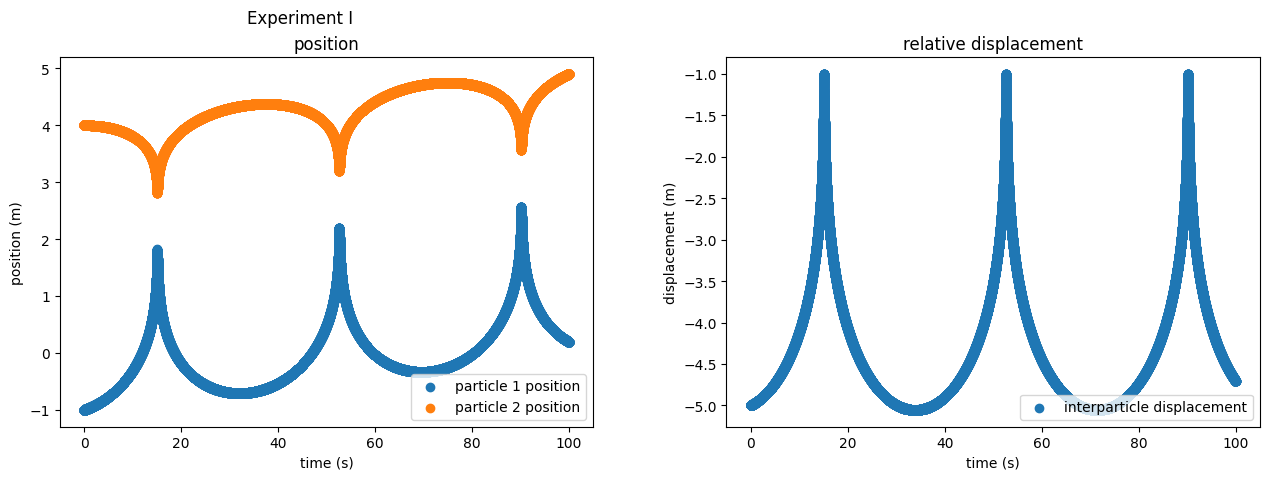

In [41]:

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, R_tix[:, 0, 0], label="particle 1 position")
ax1.scatter(T, R_tix[:, 1, 0], label="particle 2 position")
ax1.set_title("position")
ax1.set(xlabel='time (s)', ylabel='position (m)')
ax1.legend(loc="lower right")

ax2.scatter(T, R_tix[:, 0, 0]-R_tix[:, 1, 0], label="interparticle displacement")
ax2.set_title("relative displacement")
ax2.set(xlabel='time (s)', ylabel='displacement (m)')
ax2.legend(loc="lower right")
fig.show()

In our second experiment we have inelastic scattering. We have an initial velocity < experiment 1. We also have the same repulsive force as in experiement 1. As the particles tend towards eachother they begin to repel. However the main difference in this experiement is that we have an attractive force at longer distances because of the -6/R^7 term. So, as the particles separate due to 12/R^13 they again become attracted because of -6/R^7. Assuming that there are no outside forces (closed system) these particles will oscillate in this manner to infinity. We must take note that if they initial velocity of particle 1 is large enough, it can cause the attractive Lennard-Jones force to become negligible and we will have a similiar case to experiement 1. If the initial velocity is sufficiently small, we see oscillation.

The second graph shows us the relative displacement of the two particles which we see follows a repetative path. They oscillate becuase of the Lennard Jones repulsive and attractive forces.

###   <font color='Red'> Plot: Total Momentum in Time </font>


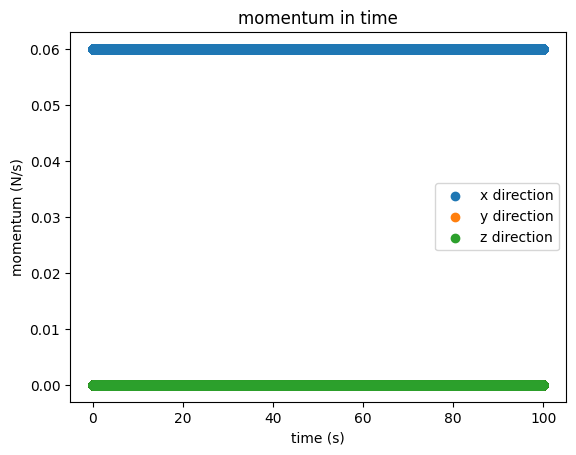

In [42]:
p_tx = np.sum(p_tix, axis=1)
plt.scatter(T, p_tx[:,0], label="x direction")
plt.scatter(T, p_tx[:,1], label="y direction")
plt.scatter(T, p_tx[:,2], label="z direction")
plt.title("momentum in time")
plt.xlabel("time (s)")
plt.ylabel("momentum (N/s)")
plt.legend()
plt.show()

###   <font color='Red'> Plot: Energy (kinetic, potential, and total) in Time </font>

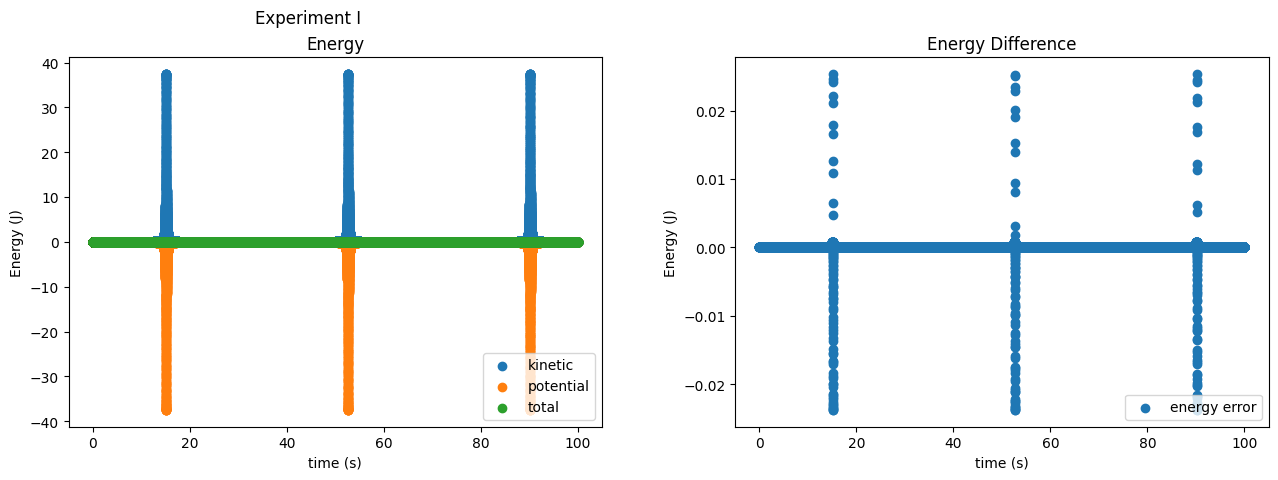

In [43]:

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, K, label="kinetic")
ax1.scatter(T, U, label="potential")
ax1.scatter(T, K+U, label="total")
ax1.set_title("Energy")
ax1.set(xlabel='time (s)', ylabel='Energy (J)')
ax1.legend(loc="lower right")

ax2.scatter(T, (K+U) - (K+U)[0], label="energy error")
ax2.set_title("Energy Difference")
ax2.set(xlabel='time (s)', ylabel='Energy (J)')
ax2.legend(loc="lower right")

fig.show()

#   <font color='Red'> **Conclusion** </font>


##  <font color='Red'> Q1: What is an elastic collision between 2-particles? </font>

##  <font color='Red'> Q2: What is an inelastic collision between 2-particles? </font>